# Stage 5: Refine Selected Classifier

<!--
- has **`location_raw`**: True
- vars one-hot encoded: False
- var label-encoded: True
- oversampled: True
-->

In [1]:
from datetime import datetime
import pickle

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
import humanize
import numpy as np
import pandas as pd

# from scripts.oversample import lop_off, oversample

%matplotlib inline
%load_ext autoreload

In [2]:
X_train = pickle.load(open('./data/stage4-train.pkl', 'rb'))
y_train = X_train.pop('stop_outcome')
X_test = pickle.load(open('./data/stage4-test.pkl', 'rb'))
y_test = X_test.pop('stop_outcome')

print('Row counts:\n\ttrain: {}\n\ttest: {}'.format(X_train.shape[0], X_test.shape[0]))

Row counts:
	train: 628906
	test: 55547


In [3]:
# features = pickle.load(open('./data/stage4-l_encoded-oversampled.pkl', 'rb'))
# labels = features.pop('stop_outcome')

In [4]:
# print('Row count: {}'.format(features.shape[0]))

In [5]:
# Take out 5% of data for final final testing; shuffle first
# final_test_features = pickle.load(open('./data/final_test_set.pkl', 'rb'))
# final_test_outcomes = final_test_features.pop('stop_outcome')
# print('Final test set row count: {}'.format(final_test_features.shape[0]))

In [6]:
# Split the 'features' and 'labels' data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(features,
#                                                     labels, 
#                                                     test_size=0.2, 
#                                                     random_state=0)

# X_train = features
# y_train = labels
# X_test = final_test_features
# y_test = final_test_outcomes

# RandomizedSearchCV

In [7]:
from sklearn.externals.joblib import parallel_backend


params_rfc = {
#     'class_weight': None,
#     'n_estimators': [10, 100],
    'n_estimators': [10],
    'criterion': ['gini', 'entropy'],
#     'max_depth': [None, 19],
    'max_depth': [None, 6],
#     'max_features': [None, 'sqrt', 'log2'],
    'max_features': [None, 'sqrt', 'log2'],
#     'min_impurity_split': [0.0000001],

#     'min_samples_split': [2, 5, 10], 
#     'min_samples_leaf':[1, 2, 4],

#     'min_weight_fraction_leaf': [0],

#     'max_leaf_nodes': [None, 100, 1000, 2000],
#     'n_jobs': [8],
    'random_state': [0],
    'verbose': [3],
}

rfc = RandomForestClassifier()

# clf = RandomizedSearchCV(rfc, params_rfc, scoring='accuracy', n_jobs=8, cv=5, verbose=3)
clf = RandomizedSearchCV(rfc, params_rfc, scoring='accuracy', cv=5, verbose=3)

with parallel_backend('threading'):
    clf.fit(X_train, y_train)

timestamp = datetime.now().strftime('%Y%m%d%H%M%S')
pickle.dump(clf, open('{}-randomforestclassifier-clf.pkl'.format(timestamp), 'wb'))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] verbose=3, random_state=0, n_estimators=10, max_features=sqrt, max_depth=6, criterion=gini [CV] verbose=3, random_state=0, n_estimators=10, max_features=sqrt, max_depth=6, criterion=gini [CV] verbose=3, random_state=0, n_estimators=10, max_features=sqrt, max_depth=6, criterion=gini [CV] verbose=3, random_state=0, n_estimators=10, max_features=log2, max_depth=6, criterion=gini [CV] verbose=3, random_state=0, n_estimators=10, max_features=log2, max_depth=6, criterion=gini [CV] verbose=3, random_state=0, n_estimators=10, max_features=sqrt, max_depth=6, criterion=gini [CV] verbose=3, random_state=0, n_estimators=10, max_features=sqrt, max_depth=6, criterion=gini [CV] verbose=3, random_state=0, n_estimators=10, max_features=log2, max_depth=6, criterion=gini 







building tree 1 of 10
building tree 1 of 10building tree 1 of 10building tree 1 of 10building tree 1 of 10


building tree 1 of 10building tree 1 of 10building tre

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


building tree 2 of 10
building tree 2 of 10
building tree 2 of 10
building tree 2 of 10
building tree 2 of 10
building tree 2 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


building tree 2 of 10
building tree 2 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.3s remaining:    0.0s


building tree 3 of 10
building tree 3 of 10
building tree 3 of 10building tree 3 of 10

building tree 3 of 10
building tree 3 of 10
building tree 3 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.3s remaining:    0.0s


building tree 3 of 10
building tree 4 of 10
building tree 4 of 10building tree 4 of 10

building tree 4 of 10
building tree 4 of 10
building tree 4 of 10
building tree 4 of 10
building tree 4 of 10
building tree 5 of 10building tree 5 of 10

building tree 5 of 10
building tree 5 of 10
building tree 5 of 10
building tree 5 of 10
building tree 5 of 10
building tree 5 of 10
building tree 6 of 10
building tree 6 of 10
building tree 6 of 10
building tree 6 of 10
building tree 6 of 10
building tree 6 of 10
building tree 7 of 10
building tree 6 of 10
building tree 6 of 10
building tree 7 of 10
building tree 7 of 10
building tree 7 of 10
building tree 7 of 10
building tree 8 of 10
building tree 7 of 10
building tree 8 of 10
building tree 7 of 10
building tree 8 of 10
building tree 7 of 10
building tree 8 of 10
building tree 8 of 10
building tree 9 of 10
building tree 9 of 10
building tree 8 of 10
building tree 8 of 10
building tree 9 of 10
building tree 8 of 10
building tree 9 of 10
building t

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    5.5s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    5.7s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    5.7s finished
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished


building tree 10 of 10building tree 10 of 10

building tree 10 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    6.2s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    6.6s finished
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  verbose=3, random_state=0, n_estimators=10, max_features=log2, max_depth=6, criterion=gini, score=0.4537569267218419, total=  14.3s
[CV] verbose=3, random_state=0, n_estimators=10, max_features=log2, max_depth=6, criterion=gini 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


[CV]  verbose=3, random_state=0, n_estimators=10, max_features=log2, max_depth=6, criterion=gini, score=0.45510124579633177, total=  14.7s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    3.9s finished


[CV] verbose=3, random_state=0, n_estimators=10, max_features=log2, max_depth=6, criterion=gini 
building tree 1 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    5.2s finished


[CV]  verbose=3, random_state=0, n_estimators=10, max_features=log2, max_depth=6, criterion=gini, score=0.45819023087197097, total=  14.9s
[CV] verbose=3, random_state=0, n_estimators=10, max_features=sqrt, max_depth=6, criterion=entropy 
building tree 1 of 10
[CV]  verbose=3, random_state=0, n_estimators=10, max_features=sqrt, max_depth=6, criterion=gini, score=0.4633657698912421, total=  15.3s
[CV] verbose=3, random_state=0, n_estimators=10, max_features=sqrt, max_depth=6, criterion=entropy 


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    5.9s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.0s remaining:    0.0s


building tree 2 of 10[CV]  verbose=3, random_state=0, n_estimators=10, max_features=sqrt, max_depth=6, criterion=gini, score=0.4625414417351068, total=  15.5s

[CV] verbose=3, random_state=0, n_estimators=10, max_features=sqrt, max_depth=6, criterion=entropy 


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    7.5s finished


building tree 1 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    7.9s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    8.3s finished


building tree 1 of 10building tree 2 of 10

[CV]  verbose=3, random_state=0, n_estimators=10, max_features=sqrt, max_depth=6, criterion=gini, score=0.4631786489430209, total=  16.1s
[CV] verbose=3, random_state=0, n_estimators=10, max_features=sqrt, max_depth=6, criterion=entropy 
[CV]  verbose=3, random_state=0, n_estimators=10, max_features=sqrt, max_depth=6, criterion=gini, score=0.4625261366979114, total=  16.7s
[CV]  verbose=3, random_state=0, n_estimators=10, max_features=sqrt, max_depth=6, criterion=gini, score=0.4625255408295502, total=  16.7s[CV] verbose=3, random_state=0, n_estimators=10, max_features=None, max_depth=None, criterion=gini 

[CV] verbose=3, random_state=0, n_estimators=10, max_features=sqrt, max_depth=6, criterion=entropy 
building tree 1 of 10
building tree 3 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    9.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.5s remaining:    0.0s


building tree 2 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   10.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.0s remaining:    0.0s


building tree 1 of 10building tree 3 of 10

building tree 1 of 10
building tree 2 of 10
building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    7.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


building tree 2 of 10
building tree 4 of 10
building tree 3 of 10
building tree 2 of 10
building tree 2 of 10
building tree 4 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.7s remaining:    0.0s


building tree 3 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.2s remaining:    0.0s


building tree 3 of 10
building tree 4 of 10
building tree 5 of 10
building tree 3 of 10building tree 3 of 10

building tree 5 of 10
building tree 4 of 10
building tree 4 of 10
building tree 6 of 10
building tree 5 of 10
building tree 4 of 10
building tree 6 of 10
building tree 4 of 10
building tree 5 of 10
building tree 7 of 10
building tree 7 of 10
building tree 5 of 10
building tree 6 of 10
building tree 5 of 10
building tree 5 of 10
building tree 8 of 10
building tree 6 of 10
building tree 8 of 10
building tree 7 of 10building tree 6 of 10

building tree 6 of 10
building tree 9 of 10
building tree 7 of 10
building tree 6 of 10
building tree 9 of 10
building tree 7 of 10
building tree 8 of 10
building tree 7 of 10
building tree 10 of 10
building tree 10 of 10
building tree 7 of 10
building tree 8 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   16.5s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   14.7s finished


building tree 2 of 10
building tree 8 of 10
building tree 9 of 10
building tree 8 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished


building tree 9 of 10
building tree 8 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.4s finished


building tree 9 of 10
building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


building tree 9 of 10
building tree 10 of 10
building tree 10 of 10
building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   13.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   12.8s finished


[CV]  verbose=3, random_state=0, n_estimators=10, max_features=log2, max_depth=6, criterion=gini, score=0.4604981753710874, total=  18.8s
[CV] verbose=3, random_state=0, n_estimators=10, max_features=None, max_depth=None, criterion=gini 
building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   11.6s finished
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    8.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV]  verbose=3, random_state=0, n_estimators=10, max_features=log2, max_depth=6, criterion=gini, score=0.4609115989155582, total=  17.4sbuilding tree 3 of 10

[CV] verbose=3, random_state=0, n_estimators=10, max_features=None, max_depth=None, criterion=gini 
building tree 1 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    8.9s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    8.9s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    2.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.4s finished


building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    2.3s finished
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV]  verbose=3, random_state=0, n_estimators=10, max_features=sqrt, max_depth=6, criterion=entropy, score=0.46274565922533867, total=  19.0s
[CV] verbose=3, random_state=0, n_estimators=10, max_features=None, max_depth=None, criterion=gini 


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.7s finished


[CV]  verbose=3, random_state=0, n_estimators=10, max_features=sqrt, max_depth=6, criterion=entropy, score=0.46243928034790077, total=  19.0sbuilding tree 4 of 10

building tree 2 of 10
[CV] verbose=3, random_state=0, n_estimators=10, max_features=None, max_depth=None, criterion=gini 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    3.3s finished


building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    4.5s finished


building tree 2 of 10
[CV]  verbose=3, random_state=0, n_estimators=10, max_features=sqrt, max_depth=6, criterion=entropy, score=0.4618424086308743, total=  17.4s
[CV] verbose=3, random_state=0, n_estimators=10, max_features=sqrt, max_depth=None, criterion=gini 
building tree 1 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    5.7s finished


[CV]  verbose=3, random_state=0, n_estimators=10, max_features=sqrt, max_depth=6, criterion=entropy, score=0.4575565078431217, total=  16.4s
[CV] verbose=3, random_state=0, n_estimators=10, max_features=sqrt, max_depth=None, criterion=gini 
[CV]  verbose=3, random_state=0, n_estimators=10, max_features=sqrt, max_depth=6, criterion=entropy, score=0.4610865088766805, total=  14.6s
[CV] verbose=3, random_state=0, n_estimators=10, max_features=sqrt, max_depth=None, criterion=gini building tree 5 of 10building tree 3 of 10


building tree 1 of 10
building tree 1 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   10.5s remaining:    0.0s


building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.9s remaining:    0.0s


building tree 2 of 10
building tree 2 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   12.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.2s remaining:    0.0s


building tree 3 of 10
building tree 2 of 10
building tree 2 of 10
building tree 2 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.5s remaining:    0.0s


building tree 3 of 10
building tree 3 of 10
building tree 4 of 10
building tree 6 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.8s remaining:    0.0s


building tree 3 of 10
building tree 4 of 10
building tree 4 of 10
building tree 4 of 10
building tree 4 of 10
building tree 5 of 10
building tree 3 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   13.8s remaining:    0.0s


building tree 5 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   12.3s remaining:    0.0s


building tree 3 of 10
building tree 5 of 10
building tree 5 of 10
building tree 6 of 10
building tree 6 of 10
building tree 7 of 10
building tree 6 of 10
building tree 7 of 10
building tree 7 of 10
building tree 7 of 10
building tree 5 of 10
building tree 4 of 10
building tree 8 of 10
building tree 8 of 10
building tree 4 of 10
building tree 6 of 10
building tree 8 of 10
building tree 8 of 10
building tree 9 of 10
building tree 9 of 10
building tree 9 of 10
building tree 10 of 10
building tree 10 of 10
building tree 10 of 10
building tree 6 of 10
building tree 7 of 10
building tree 5 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   16.3s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   17.8s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


building tree 5 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   18.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.9s finished


building tree 9 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.7s remaining:    0.0s


building tree 7 of 10
building tree 6 of 10
building tree 8 of 10
building tree 6 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    4.0s finished


building tree 10 of 10[CV]  verbose=3, random_state=0, n_estimators=10, max_features=sqrt, max_depth=None, criterion=gini, score=0.9127154487057177, total=  23.3s

[CV] verbose=3, random_state=0, n_estimators=10, max_features=sqrt, max_depth=None, criterion=gini 


[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  1.2min
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    4.3s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    4.8s finished


building tree 8 of 10building tree 7 of 10

building tree 9 of 10
[CV]  verbose=3, random_state=0, n_estimators=10, max_features=sqrt, max_depth=None, criterion=gini, score=0.9131599659731442, total=  22.6s[CV]  verbose=3, random_state=0, n_estimators=10, max_features=sqrt, max_depth=None, criterion=gini, score=0.9130313799381464, total=  19.7s

[CV] verbose=3, random_state=0, n_estimators=10, max_features=sqrt, max_depth=None, criterion=gini [CV] verbose=3, random_state=0, n_estimators=10, max_features=log2, max_depth=None, criterion=entropy 

building tree 1 of 10
building tree 7 of 10
building tree 1 of 10
building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.3s remaining:    0.0s


building tree 2 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s


building tree 2 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s


building tree 2 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.0s remaining:    0.0s


building tree 3 of 10
building tree 3 of 10
building tree 9 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   51.9s finished


building tree 3 of 10
building tree 8 of 10
building tree 10 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


building tree 4 of 10
building tree 4 of 10
building tree 8 of 10

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.0s finished



building tree 4 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.7s remaining:    0.0s


building tree 5 of 10
building tree 5 of 10
building tree 5 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   47.4s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


building tree 10 of 10
building tree 9 of 10
building tree 6 of 10
building tree 6 of 10
building tree 6 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    3.5s finished


building tree 9 of 10
[CV]  verbose=3, random_state=0, n_estimators=10, max_features=None, max_depth=None, criterion=gini, score=0.9081918208993195, total=  56.3s
[CV] verbose=3, random_state=0, n_estimators=10, max_features=log2, max_depth=None, criterion=entropy 


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.8s finished


building tree 7 of 10building tree 7 of 10

building tree 7 of 10
building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.8s remaining:    0.0s


building tree 8 of 10
building tree 8 of 10
building tree 8 of 10
building tree 2 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   50.9s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.0s finished


building tree 9 of 10
building tree 10 of 10
building tree 9 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.3s remaining:    0.0s


building tree 3 of 10
building tree 9 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    3.8s finished
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.4s remaining:    0.0s


[CV]  verbose=3, random_state=0, n_estimators=10, max_features=None, max_depth=None, criterion=gini, score=0.9085488500035775, total=  52.0s
[CV] verbose=3, random_state=0, n_estimators=10, max_features=log2, max_depth=None, criterion=entropy 
building tree 4 of 10
building tree 10 of 10
building tree 10 of 10
building tree 1 of 10
building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   51.8s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   20.1s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   18.0s finished


building tree 5 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   18.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   51.2s finished
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    4.8s finished
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining

building tree 2 of 10
[CV]  verbose=3, random_state=0, n_estimators=10, max_features=None, max_depth=None, criterion=gini, score=0.9085632965233222, total=  53.6s
[CV] verbose=3, random_state=0, n_estimators=10, max_features=log2, max_depth=None, criterion=entropy 
building tree 6 of 10
building tree 3 of 10
building tree 1 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    2.6s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    2.9s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    3.0s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    2.9s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s


building tree 2 of 10
building tree 7 of 10
building tree 4 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    5.1s finished


building tree 5 of 10building tree 8 of 10

building tree 3 of 10
[CV]  verbose=3, random_state=0, n_estimators=10, max_features=None, max_depth=None, criterion=gini, score=0.9081245676941302, total=  55.0s
[CV] verbose=3, random_state=0, n_estimators=10, max_features=log2, max_depth=None, criterion=entropy 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.7s remaining:    0.0s


building tree 1 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    5.0s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    5.0s finished


building tree 6 of 10building tree 9 of 10
building tree 4 of 10
[CV]  verbose=3, random_state=0, n_estimators=10, max_features=sqrt, max_depth=None, criterion=gini, score=0.913435470150025, total=  26.1s
building tree 2 of 10[CV]  verbose=3, random_state=0, n_estimators=10, max_features=log2, max_depth=None, criterion=entropy, score=0.9131765566367741, total=  23.4s

[CV] verbose=3, random_state=0, n_estimators=10, max_features=None, max_depth=None, criterion=entropy [CV] verbose=3, random_state=0, n_estimators=10, max_features=None, max_depth=None, criterion=entropy 




[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    6.4s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.4s remaining:    0.0s


[CV]  verbose=3, random_state=0, n_estimators=10, max_features=sqrt, max_depth=None, criterion=gini, score=0.9122747040443954, total=  23.7s
[CV] verbose=3, random_state=0, n_estimators=10, max_features=None, max_depth=None, criterion=entropy 


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   10.3s finished


building tree 1 of 10
building tree 1 of 10
building tree 1 of 10
[CV]  verbose=3, random_state=0, n_estimators=10, max_features=None, max_depth=None, criterion=gini, score=0.907536234188537, total=  57.0s
[CV] verbose=3, random_state=0, n_estimators=10, max_features=None, max_depth=None, criterion=entropy 
building tree 7 of 10building tree 5 of 10building tree 10 of 10


building tree 3 of 10
building tree 1 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    8.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   25.3s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


building tree 8 of 10
building tree 4 of 10
building tree 6 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.0s finished


building tree 5 of 10
building tree 9 of 10
building tree 7 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.7s remaining:    0.0s


building tree 2 of 10
building tree 2 of 10
building tree 2 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.7s remaining:    0.0s


building tree 10 of 10
building tree 6 of 10
building tree 8 of 10
building tree 2 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   24.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


building tree 7 of 10
building tree 9 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    4.1s finished
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    9.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    9.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    9.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.9s finished


building tree 3 of 10building tree 3 of 10building tree 3 of 10


[CV]  verbose=3, random_state=0, n_estimators=10, max_features=log2, max_depth=None, criterion=entropy, score=0.9131599659731442, total=  28.2s
[CV] verbose=3, random_state=0, n_estimators=10, max_features=None, max_depth=None, criterion=entropy 
building tree 8 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    8.8s remaining:    0.0s


building tree 3 of 10
building tree 1 of 10
building tree 10 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.9s remaining:    0.0s


building tree 9 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   25.2s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.8s finished


building tree 4 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    3.7s finished


building tree 4 of 10building tree 4 of 10building tree 4 of 10

building tree 2 of 10

[CV]  verbose=3, random_state=0, n_estimators=10, max_features=log2, max_depth=None, criterion=entropy, score=0.9141205746495894, total=  27.5s
[CV] verbose=3, random_state=0, n_estimators=10, max_features=log2, max_depth=6, criterion=entropy 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   23.9s finished
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


building tree 1 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


building tree 2 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.2s remaining:    0.0s


building tree 3 of 10
building tree 4 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.9s remaining:    0.0s


building tree 5 of 10
building tree 5 of 10
building tree 6 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    5.5s finished
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    9.5s remaining:    0.0s


building tree 5 of 10building tree 5 of 10building tree 5 of 10


building tree 3 of 10
building tree 7 of 10
[CV]  verbose=3, random_state=0, n_estimators=10, max_features=log2, max_depth=None, criterion=entropy, score=0.914071506372288, total=  27.6s
[CV] verbose=3, random_state=0, n_estimators=10, max_features=log2, max_depth=6, criterion=entropy 
building tree 8 of 10
building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


building tree 2 of 10
building tree 9 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.9s remaining:    0.0s


building tree 3 of 10
building tree 10 of 10
building tree 4 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    7.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    5.9s finished


building tree 5 of 10
[CV]  verbose=3, random_state=0, n_estimators=10, max_features=log2, max_depth=None, criterion=entropy, score=0.9132526097361244, total=  26.5s
[CV] verbose=3, random_state=0, n_estimators=10, max_features=log2, max_depth=6, criterion=entropy 
building tree 6 of 10building tree 6 of 10

building tree 6 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


building tree 4 of 10
building tree 6 of 10
building tree 1 of 10
building tree 6 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.8s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


building tree 2 of 10
[CV]  verbose=3, random_state=0, n_estimators=10, max_features=log2, max_depth=6, criterion=entropy, score=0.4557574890288113, total=   8.7s
building tree 7 of 10
[CV] verbose=3, random_state=0, n_estimators=10, max_features=log2, max_depth=6, criterion=entropy 
building tree 1 of 10
building tree 3 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


building tree 2 of 10
building tree 8 of 10
building tree 7 of 10
building tree 7 of 10
building tree 4 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.0s remaining:    0.0s


building tree 3 of 10
building tree 9 of 10
building tree 5 of 10
building tree 4 of 10
building tree 10 of 10
building tree 7 of 10
building tree 6 of 10
building tree 5 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    9.3s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished


building tree 7 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


building tree 7 of 10
building tree 6 of 10
building tree 8 of 10
building tree 5 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.6s finished


building tree 7 of 10
[CV]  verbose=3, random_state=0, n_estimators=10, max_features=log2, max_depth=6, criterion=entropy, score=0.4597044115659509, total=  11.1s
[CV] verbose=3, random_state=0, n_estimators=10, max_features=log2, max_depth=6, criterion=entropy 
building tree 8 of 10
building tree 9 of 10
building tree 1 of 10
building tree 8 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


building tree 2 of 10
building tree 10 of 10
building tree 8 of 10
building tree 9 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    9.5s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 3 of 10
building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished


building tree 8 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


building tree 4 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    7.8s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.0s finished


[CV]  verbose=3, random_state=0, n_estimators=10, max_features=log2, max_depth=6, criterion=entropy, score=0.4612699851328897, total=  11.2s
[CV] verbose=3, random_state=0, n_estimators=10, max_features=None, max_depth=6, criterion=gini 
building tree 8 of 10
building tree 5 of 10
building tree 6 of 10
building tree 9 of 10
building tree 9 of 10
building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


building tree 6 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.6s finished


building tree 7 of 10
[CV]  verbose=3, random_state=0, n_estimators=10, max_features=log2, max_depth=6, criterion=entropy, score=0.4584469585542897, total=  10.5s
[CV] verbose=3, random_state=0, n_estimators=10, max_features=None, max_depth=6, criterion=gini 
building tree 9 of 10
building tree 8 of 10
building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.1s remaining:    0.0s


building tree 2 of 10
building tree 9 of 10
building tree 9 of 10
building tree 7 of 10
building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    9.4s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished


building tree 10 of 10
building tree 2 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.3s remaining:    0.0s


building tree 3 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.5s finished


building tree 10 of 10
[CV]  verbose=3, random_state=0, n_estimators=10, max_features=log2, max_depth=6, criterion=entropy, score=0.4555291423846588, total=  11.2s
[CV] verbose=3, random_state=0, n_estimators=10, max_features=None, max_depth=6, criterion=gini 
building tree 10 of 10
building tree 8 of 10
building tree 1 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.7s remaining:    0.0s


building tree 3 of 10
building tree 4 of 10
building tree 10 of 10
building tree 4 of 10
building tree 2 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   50.7s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


building tree 5 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   49.9s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   52.3s finished
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.9s remaining:    0.0s


building tree 3 of 10
building tree 5 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


building tree 6 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.8s remaining:    0.0s


building tree 9 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   53.9s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


building tree 4 of 10
building tree 6 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.1s finished


building tree 7 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.7s remaining:    0.0s


building tree 5 of 10
building tree 7 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    4.1s finished


[CV]  verbose=3, random_state=0, n_estimators=10, max_features=None, max_depth=None, criterion=entropy, score=0.9083500950048894, total=  56.1s
[CV] verbose=3, random_state=0, n_estimators=10, max_features=None, max_depth=6, criterion=gini 
building tree 10 of 10
building tree 8 of 10
building tree 1 of 10
building tree 6 of 10
building tree 8 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    5.7s finished


[CV]  verbose=3, random_state=0, n_estimators=10, max_features=None, max_depth=None, criterion=entropy, score=0.909651054627561, total=  52.5s
[CV] verbose=3, random_state=0, n_estimators=10, max_features=None, max_depth=6, criterion=gini 


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    7.2s finished


building tree 1 of 10
building tree 9 of 10building tree 9 of 10

[CV]  verbose=3, random_state=0, n_estimators=10, max_features=None, max_depth=None, criterion=entropy, score=0.9084996939124351, total=  57.1s
[CV] verbose=3, random_state=0, n_estimators=10, max_features=None, max_depth=6, criterion=entropy 
building tree 7 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   50.3s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.2s remaining:    0.0s


building tree 2 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    8.2s finished


building tree 1 of 10
[CV]  verbose=3, random_state=0, n_estimators=10, max_features=None, max_depth=None, criterion=entropy, score=0.9079692170705336, total=  59.3s
[CV] verbose=3, random_state=0, n_estimators=10, max_features=None, max_depth=6, criterion=entropy 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.4s remaining:    0.0s


building tree 2 of 10
building tree 10 of 10building tree 1 of 10

building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    3.8s finished


building tree 8 of 10
building tree 3 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    7.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.8s remaining:    0.0s


building tree 2 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   24.4s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished


building tree 2 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   27.7s finished
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 3 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


building tree 9 of 10
building tree 4 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.4s remaining:    0.0s


[CV]  verbose=3, random_state=0, n_estimators=10, max_features=None, max_depth=6, criterion=gini, score=0.4489636914368396, total=  26.2sbuilding tree 3 of 10

[CV] verbose=3, random_state=0, n_estimators=10, max_features=None, max_depth=6, criterion=entropy 


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.5s finished


building tree 4 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.4s remaining:    0.0s


building tree 3 of 10
building tree 1 of 10
building tree 5 of 10building tree 10 of 10

[CV]  verbose=3, random_state=0, n_estimators=10, max_features=None, max_depth=6, criterion=gini, score=0.4481094574826687, total=  29.7s
[CV] verbose=3, random_state=0, n_estimators=10, max_features=None, max_depth=6, criterion=entropy 
building tree 4 of 10
building tree 1 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    7.1s finished


[CV]  verbose=3, random_state=0, n_estimators=10, max_features=None, max_depth=None, criterion=entropy, score=0.9081802208635782, total=  56.1s
[CV] verbose=3, random_state=0, n_estimators=10, max_features=None, max_depth=6, criterion=entropy 
building tree 4 of 10
building tree 2 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   27.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished


building tree 6 of 10
building tree 5 of 10
building tree 5 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.8s remaining:    0.0s


building tree 2 of 10
[CV]  verbose=3, random_state=0, n_estimators=10, max_features=None, max_depth=6, criterion=gini, score=0.4459894578672455, total=  29.2s
building tree 5 of 10
building tree 2 of 10
building tree 3 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.8s remaining:    0.0s


building tree 6 of 10
building tree 7 of 10
building tree 6 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.0s remaining:    0.0s


building tree 3 of 10
building tree 6 of 10
building tree 3 of 10
building tree 4 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.3s remaining:    0.0s


building tree 7 of 10
building tree 8 of 10
building tree 7 of 10
building tree 4 of 10
building tree 7 of 10
building tree 4 of 10
building tree 5 of 10
building tree 8 of 10
building tree 9 of 10
building tree 8 of 10
building tree 5 of 10
building tree 5 of 10
building tree 6 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10
building tree 9 of 10
building tree 6 of 10
building tree 6 of 10building tree 9 of 10

building tree 7 of 10
building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   27.3s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished


building tree 10 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


building tree 7 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.5s finished


[CV]  verbose=3, random_state=0, n_estimators=10, max_features=None, max_depth=6, criterion=gini, score=0.4459965495034942, total=  29.1s
building tree 8 of 10
building tree 7 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   26.7s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished


building tree 10 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   25.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.6s finished


[CV]  verbose=3, random_state=0, n_estimators=10, max_features=None, max_depth=6, criterion=gini, score=0.4466246352729788, total=  28.3s
building tree 8 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s


building tree 8 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   25.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished


building tree 9 of 10
[CV]  verbose=3, random_state=0, n_estimators=10, max_features=None, max_depth=6, criterion=entropy, score=0.4480299561152452, total=  26.7s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.3s finished


building tree 9 of 10
building tree 9 of 10
[CV]  verbose=3, random_state=0, n_estimators=10, max_features=None, max_depth=6, criterion=entropy, score=0.45856753297345426, total=  26.9s
building tree 10 of 10
building tree 10 of 10
building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   22.2s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   19.2s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   21.5s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished


[CV]  verbose=3, random_state=0, n_estimators=10, max_features=None, max_depth=6, criterion=entropy, score=0.44590995460363647, total=  23.9s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.4s finished


[CV]  verbose=3, random_state=0, n_estimators=10, max_features=None, max_depth=6, criterion=entropy, score=0.4483419330730885, total=  20.8s


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.0s finished


[CV]  verbose=3, random_state=0, n_estimators=10, max_features=None, max_depth=6, criterion=entropy, score=0.4459806485979377, total=  23.3s


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  3.5min finished


building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


building tree 2 of 10


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.5s remaining:    0.0s


building tree 3 of 10
building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    7.6s finished


In [8]:
print(clf.score(X_test, y_test))

0.575656651124


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished


In [9]:
clf.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=3, warm_start=False)

In [10]:
clf.cv_results_

/home/pato/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/pato/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/pato/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/pat

{'mean_fit_time': array([ 15.01512823,  15.43382711,  15.14820266,  52.91909237,
         20.93042526,  24.85213981,  54.22638116,   9.92519698,
         28.05925179,  23.96613169]),
 'mean_score_time': array([ 1.02957006,  0.58411427,  2.11698518,  1.87565141,  2.13720298,
         1.7690671 ,  1.99231386,  0.59284935,  0.43027449,  0.36497335]),
 'mean_test_score': array([ 0.46282751,  0.45769161,  0.4611341 ,  0.90819296,  0.91292339,
         0.91355624,  0.90853005,  0.4581416 ,  0.44713677,  0.44936604]),
 'mean_train_score': array([ 0.46296625,  0.45781523,  0.46155904,  0.97531944,  0.9757428 ,
         0.97587279,  0.97542081,  0.45841787,  0.4474373 ,  0.44963   ]),
 'param_criterion': masked_array(data = ['gini' 'gini' 'entropy' 'gini' 'gini' 'entropy' 'entropy' 'entropy' 'gini'
  'entropy'],
              mask = [False False False False False False False False False False],
        fill_value = ?),
 'param_max_depth': masked_array(data = [6 6 6 None None None None 6 6 6],
 

In [11]:
clf.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'log2',
 'n_estimators': 10,
 'random_state': 0,
 'verbose': 3}

In [18]:
clf.best_score_

0.91355623892918814

In [19]:
n_estimators = 10
# max_features="sqrt"
max_features="log2"
rfc10 = RandomForestClassifier(verbose=3, random_state=0, n_jobs=8, n_estimators=n_estimators, max_features=max_features, max_depth=None, criterion="entropy")
rfc10.fit(X_train, y_train)
print('{}'.format(rfc10.score(X_test, y_test)))

building tree 2 of 10
building tree 3 of 10building tree 5 of 10building tree 6 of 10building tree 7 of 10building tree 4 of 10building tree 1 of 10building tree 8 of 10






building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=8)]: Done   3 out of  10 | elapsed:    1.9s remaining:    4.4s
[Parallel(n_jobs=8)]: Done   7 out of  10 | elapsed:    2.1s remaining:    0.9s


0.5756566511242731


[Parallel(n_jobs=8)]: Done  10 out of  10 | elapsed:    2.8s finished
[Parallel(n_jobs=8)]: Done   3 out of  10 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=8)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done  10 out of  10 | elapsed:    0.0s finished


In [20]:
n_estimators = 50
# max_features="sqrt"
max_features="log2"
rfc50 = RandomForestClassifier(verbose=3, random_state=0, n_jobs=8, n_estimators=n_estimators, max_features=max_features, max_depth=None, criterion="entropy")
rfc50.fit(X_train, y_train)
print('{}'.format(rfc50.score(X_test, y_test)))

building tree 3 of 50building tree 2 of 50building tree 4 of 50building tree 5 of 50building tree 6 of 50building tree 1 of 50building tree 7 of 50building tree 8 of 50







building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50


[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    4.3s


building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 50
building tree 45 of 50
building tree 46 of 50
building tree 47 of 50
building tree 48 of 50
building tree 49 of 50
building tree 50 of 50


[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed:   12.8s finished
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.1s


0.5861522674491871


[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed:    0.2s finished


In [21]:
n_estimators = 100
# max_features="sqrt"
max_features="log2"
rfc100 = RandomForestClassifier(verbose=3, random_state=0, n_jobs=8, n_estimators=n_estimators, max_features=max_features, max_depth=None, criterion="entropy")
rfc100.fit(X_train, y_train)
print('{}'.format(rfc100.score(X_test, y_test)))

building tree 2 of 100
building tree 3 of 100building tree 4 of 100building tree 5 of 100building tree 6 of 100building tree 7 of 100




building tree 1 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100


[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    4.1s


building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 61 of 100
building tree 60 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65

[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:   24.6s finished
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.1s


0.5895187858930275


[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.4s finished


## Test with second test set

In [22]:
# print('{}'.format(rfc100.score(final_test_features, final_test_outcomes)))

# Feature Importance

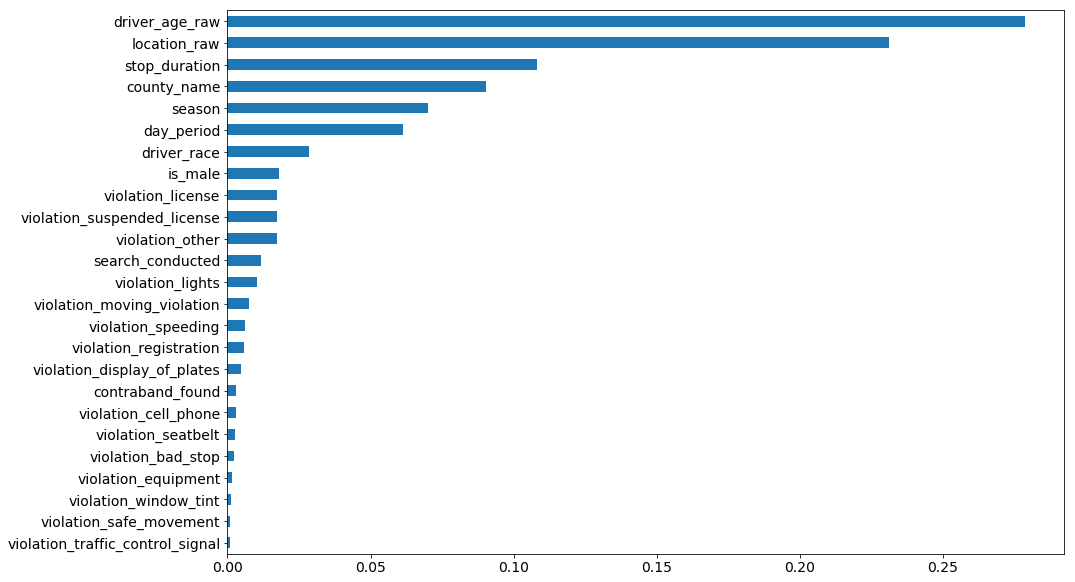

In [23]:
rfc100_df = pd.DataFrame(data=rfc100.feature_importances_, index=X_train.columns.values)
rfc100_plot = rfc100_df.sort_values(by=0).plot.barh(figsize=(15, 10), fontsize=14)
rfc100_plot.axes.legend().set_visible(False)